In [1]:
#importing all required dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_excel('Data_Train_food.xlsx')
df.head(4)

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12,4,30 minutes
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11,4,30 minutes
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99,30,65 minutes
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",₹250,₹99,3.7,176,95,30 minutes


In [3]:
df.shape

(11094, 9)

In [5]:
df.drop(columns = ['Restaurant','Location','Cuisines'],inplace = True)

#### Key Observations :
1. The Location and Cuisine column contains multiple values separated by commas.
2. The Average_Cost and Minimum Order column consist of symbols and are strings.
3. The Rating, Votes and Reviews column consists of invalid values such as ‘-’, “NEW’ etc.

In [7]:
import re
import numpy as np
def impute_avg_cost(avg_cost):
    cost = re.search('[0-9]+',avg_cost)
    if cost:
        res = cost.group(0)
        return pd.to_numeric(res)
    else:
        return np.nan

In [8]:
df['Average_Cost'] = df['Average_Cost'].apply(impute_avg_cost)

In [9]:
df['Average_Cost'].isna().sum()

1

In [10]:
avg_cost_mean = df['Average_Cost'].mean()

In [11]:
df['Average_Cost'].fillna(avg_cost_mean,inplace = True)

In [12]:
df['Average_Cost'].isna().sum()

0

In [13]:
def impute_min_order(min_order):
    order = re.search('[0-9]+',min_order)
    if order:
        res = order.group(0)
        return pd.to_numeric(res)
    else:
        return np.nan

In [14]:
df['Minimum_Order'] = df['Minimum_Order'].apply(impute_min_order)

In [15]:
df['Minimum_Order'].isna().sum()

0

In [16]:
df['Rating'].unique()

array(['3.5', '3.6', '3.7', '3.2', '3.8', '4.0', '3.9', '4.2', '-', '2.8',
       '3.0', '3.3', '3.1', '4.7', '3.4', '4.1', 'NEW', '2.9', '4.6',
       '4.3', '2.6', '4.5', '4.4', '4.8', '2.4', '2.7', '2.5',
       'Opening Soon', '2.2', '4.9', '2.3', '2.1', 'Temporarily Closed'],
      dtype=object)

In [17]:
df['Rating'].replace('-',np.nan,inplace = True)
df['Rating'].replace('NEW',np.nan,inplace = True)
df['Rating'].replace('Opening Soon',np.nan,inplace = True)
df['Rating'].replace('Temporarily Closed',np.nan,inplace = True)

In [18]:
df['Rating'].unique()

array(['3.5', '3.6', '3.7', '3.2', '3.8', '4.0', '3.9', '4.2', nan, '2.8',
       '3.0', '3.3', '3.1', '4.7', '3.4', '4.1', '2.9', '4.6', '4.3',
       '2.6', '4.5', '4.4', '4.8', '2.4', '2.7', '2.5', '2.2', '4.9',
       '2.3', '2.1'], dtype=object)

In [19]:
df['Rating'] = pd.to_numeric(df['Rating'],errors = 'ignore')

In [20]:
avg_rating = df['Rating'].mean()
df.fillna(avg_rating,inplace = True)

In [21]:
#Votes Column
df['Votes'].replace('-',np.nan,inplace = True)
df['Votes'] = pd.to_numeric(df['Votes'],errors = 'ignore')
avg_vote = df['Votes'].mean()
df['Votes'].fillna(avg_vote,inplace = True)

In [22]:
#Review Column
df['Reviews'].replace('-',np.nan,inplace = True)
df['Reviews'] = pd.to_numeric(df['Reviews'],errors = 'ignore')
avg_review = df['Reviews'].mean()
df['Reviews'].fillna(avg_review,inplace = True)

In [23]:
#Delivery Column
def impute_delivery_time(dtime):
    delivertime = re.search('[0-9]+',dtime)
    if delivertime:
        res = delivertime.group(0)
#         return res
        return pd.to_numeric(res)
    else:
        return np.nan

In [24]:
df['Delivery_Time'] = df['Delivery_Time'].apply(impute_delivery_time)

In [25]:
df.head()

,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,200.0,50,3.5,12.0,4.0,30
1,100.0,50,3.5,11.0,4.0,30
2,150.0,50,3.6,99.0,30.0,65
3,250.0,99,3.7,176.0,95.0,30
4,200.0,99,3.2,521.0,235.0,65


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11094 entries, 0 to 11093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Average_Cost   11094 non-null  float64
 1   Minimum_Order  11094 non-null  int64  
 2   Rating         11094 non-null  float64
 3   Votes          11094 non-null  float64
 4   Reviews        11094 non-null  float64
 5   Delivery_Time  11094 non-null  int64  
dtypes: float64(4), int64(2)
memory usage: 520.1 KB


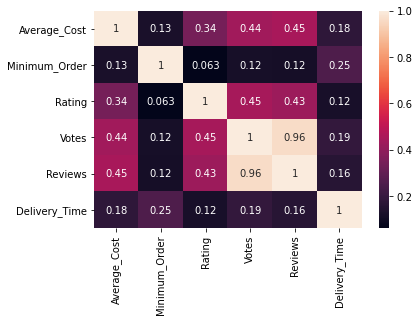

In [27]:
fig, ax = plt.subplots(1,1,figsize=(6,4))
ax = sns.heatmap(df.corr(),annot = True)

In [28]:
df.drop(columns = ['Votes'],inplace = True)

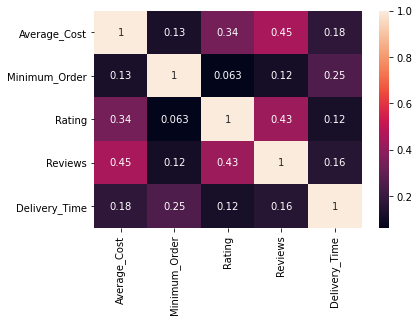

In [29]:
fig, ax = plt.subplots(1,1,figsize=(6,4))
ax = sns.heatmap(df.corr(),annot = True)

In [30]:
#apply MinMax Scaling fior cluster identification.
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

df2 = df.drop(columns = ['Delivery_Time'])
target = df[['Delivery_Time']]

df2_scaled = pd.DataFrame(mms.fit_transform(df2),columns = df2.columns)
df2_scaled['Delivery_Time'] = target

In [31]:
df2_scaled.head(3)

,Average_Cost,Minimum_Order,Rating,Reviews,Delivery_Time
0,0.209694,0.1,0.500000,0.000461,30
1,0.104320,0.1,0.500000,0.000461,30
2,0.157007,0.1,0.535714,0.004459,65


In [56]:
from sklearn.cluster import KMeans
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters = k)
    km.fit(df2_scaled[['Average_Cost','Delivery_Time']])
    sse.append(km.inertia_)

Text(0, 0.5, 'Sum of Squared Error')

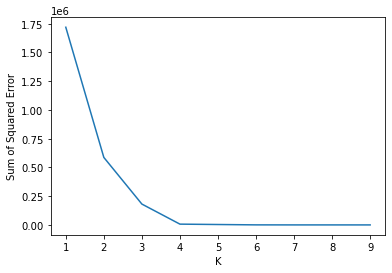

In [57]:
plt.plot(k_rng,sse)
plt.xlabel('K')
plt.ylabel('Sum of Squared Error')

In [55]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters= 3)

In [39]:
y_predict = km1.fit_predict(df2_scaled)

In [40]:
df2_scaled['cluster'] = y_predict

In [41]:
df2_scaled.head()

,Average_Cost,Minimum_Order,Rating,Reviews,Delivery_Time,cluster
0,0.209694,0.100,0.500000,0.000461,30,0
1,0.104320,0.100,0.500000,0.000461,30,0
2,0.157007,0.100,0.535714,0.004459,65,1
3,0.262381,0.198,0.571429,0.014455,30,0
4,0.209694,0.198,0.392857,0.035983,65,1


Text(0, 0.5, 'Delivery Time')

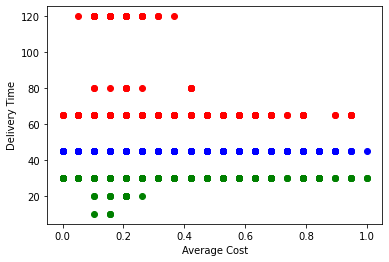

In [42]:
cluster1 = df2_scaled[df2_scaled['cluster'] == 0]
cluster2 = df2_scaled[df2_scaled['cluster'] == 1]
cluster3 = df2_scaled[df2_scaled['cluster'] == 2]

plt.scatter(cluster1['Average_Cost'],cluster1['Delivery_Time'],color = 'green')
plt.scatter(cluster2['Average_Cost'],cluster2['Delivery_Time'],color = 'red')
plt.scatter(cluster3['Average_Cost'],cluster3['Delivery_Time'],color = 'blue')

plt.xlabel('Average Cost')
plt.ylabel('Delivery Time')

Text(0, 0.5, 'Delivery Time')

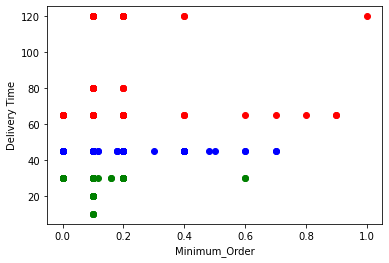

In [43]:
cluster1 = df2_scaled[df2_scaled['cluster'] == 0]
cluster2 = df2_scaled[df2_scaled['cluster'] == 1]
cluster3 = df2_scaled[df2_scaled['cluster'] == 2]

plt.scatter(cluster1['Minimum_Order'],cluster1['Delivery_Time'],color = 'green')
plt.scatter(cluster2['Minimum_Order'],cluster2['Delivery_Time'],color = 'red')
plt.scatter(cluster3['Minimum_Order'],cluster3['Delivery_Time'],color = 'blue')


plt.xlabel('Minimum_Order')
plt.ylabel('Delivery Time')

Text(0, 0.5, 'Delivery Time')

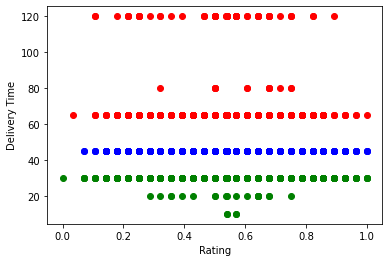

In [50]:
cluster1 = df2_scaled[df2_scaled['cluster'] == 0]
cluster2 = df2_scaled[df2_scaled['cluster'] == 1]
cluster3 = df2_scaled[df2_scaled['cluster'] == 2]


plt.scatter(cluster1['Rating'],cluster1['Delivery_Time'],color = 'green')
plt.scatter(cluster2['Rating'],cluster2['Delivery_Time'],color = 'red')
plt.scatter(cluster3['Rating'],cluster3['Delivery_Time'],color = 'blue')

plt.xlabel('Rating')
plt.ylabel('Delivery Time')

Text(0, 0.5, 'Delivery Time')

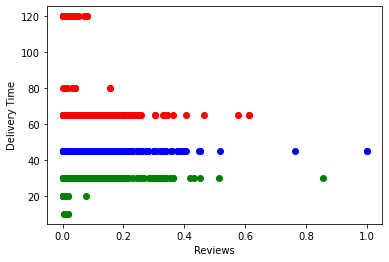

In [51]:
cluster1 = df2_scaled[df2_scaled['cluster'] == 0]
cluster2 = df2_scaled[df2_scaled['cluster'] == 1]
cluster3 = df2_scaled[df2_scaled['cluster'] == 2]


plt.scatter(cluster1['Reviews'],cluster1['Delivery_Time'],color = 'green')
plt.scatter(cluster2['Reviews'],cluster2['Delivery_Time'],color = 'red')
plt.scatter(cluster3['Reviews'],cluster3['Delivery_Time'],color = 'blue')

plt.xlabel('Reviews')
plt.ylabel('Delivery Time')

In [95]:
df2_scaled.cluster.unique()

array([0, 1, 2])

In [96]:
df2_scaled.head()

,Average_Cost,Minimum_Order,Rating,Reviews,Delivery_Time,cluster
0,0.209694,0.100,0.500000,0.000461,30,0
1,0.104320,0.100,0.500000,0.000461,30,0
2,0.157007,0.100,0.535714,0.004459,65,1
3,0.262381,0.198,0.571429,0.014455,30,0
4,0.209694,0.198,0.392857,0.035983,65,1


In [168]:
##apply onehot encoding on cluster
def num_to_cat(num):
    return str(num)

In [171]:
df2_scaled['cluster'] = df2_scaled.cluster.apply(num_to_cat)

In [179]:
cluster_n = pd.get_dummies(df2_scaled['cluster'],prefix = 'cluster',drop_first=True)

In [183]:
df2_scaled.drop(columns = ['cluster'],inplace = True)
df3 = pd.concat([df2_scaled,cluster_n],axis = 1)

In [58]:
### Model Training and Testing

In [185]:
x = df3.drop(columns = ['Delivery_Time'])
y = df3[['Delivery_Time']]

In [316]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25,random_state = 10)

In [317]:
from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor(criterion='friedman_mse',max_depth = 10)
clf.fit(x_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=10)

In [318]:
clf.score(x_test,y_test)

0.8757212202583653

In [319]:
clf.score(x_train,y_train)

0.9669320579205231

Our model is Overfitting so we will apply Complexity pruning

In [320]:
path = clf.cost_complexity_pruning_path(x_train,y_train)
ccp_alphas, impurities = path.ccp_alphas , path.impurities

In [321]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state = 0, ccp_alpha = ccp_alpha)
    clf.fit(x_train,y_train)
    clfs.append(clf)

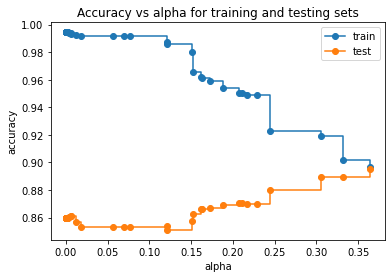

In [324]:
train_scores = [clf.score(x_train,y_train) for clf in clfs]
test_scores = [clf.score(x_test,y_test) for clf in clfs]


fig, ax = plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.set_title('Accuracy vs alpha for training and testing sets')
ax.plot(ccp_alphas[:40], train_scores[:40],marker = 'o' ,label = 'train', drawstyle = 'steps-post')
ax.plot(ccp_alphas[:40], test_scores[:40],marker = 'o' ,label = 'test', drawstyle = 'steps-post')
ax.legend()
plt.show()

1. Decision Tree

In [337]:
from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor(criterion='friedman_mse',max_depth = 10 ,ccp_alpha = 0.35)
clf.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.35, criterion='friedman_mse', max_depth=10)

Model Score

In [338]:
clf.score(x_test,y_test)

0.8893899081036775

In [339]:
clf.score(x_train,y_train)

0.9017425934106242